Stock prediction model using LSTM.

> Made by: Garv Saxena

> For SWOC S3

In [ ]:
#Updating the modules (otherwise error message in fetching dataset from yahoo)
!pip install --upgrade pandas

In [41]:
pip install yfinance

In [42]:
import yfinance as yf
import datetime as dt

In [18]:
#Importing libraries
import pandas_datareader as dr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

#2138 is training size
#549 is testing size

In [21]:
#building dataframe for tata motors stock from yahoo finance
df = yf.download('TTM', dt.datetime(2012,1,1) , dt.datetime(2023,1,7))
df.head

[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.head of                                 Open       High        Low      Close  \
Date                                                                    
2012-01-03 00:00:00-05:00  17.820000  18.320000  17.820000  18.110001   
2012-01-04 00:00:00-05:00  18.440001  19.000000  18.440001  18.790001   
2012-01-05 00:00:00-05:00  18.790001  19.180000  18.700001  19.100000   
2012-01-06 00:00:00-05:00  19.080000  19.180000  18.889999  19.049999   
2012-01-09 00:00:00-05:00  18.820000  19.150000  18.760000  19.129999   
...                              ...        ...        ...        ...   
2022-12-30 00:00:00-05:00  22.950001  23.330000  22.940001  23.110001   
2023-01-03 00:00:00-05:00  23.400000  23.799999  23.389999  23.580000   
2023-01-04 00:00:00-05:00  23.200001  23.420000  23.049999  23.160000   
2023-01-05 00:00:00-05:00  22.690001  23.150000  22.610001  22.990000   
2023-01-06 00:00:00-05:00  22.830000  23.340000  22.830000  23.330000   

                    

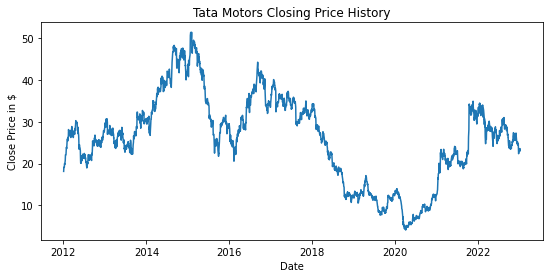

In [22]:
#Ploting tata stock price (Just for Fun)
plt.figure(figsize=(9,4))
plt.title("Tata Motors Closing Price History")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=10)
plt.ylabel('Close Price in $')
plt.show()

In [24]:
#Filtering only required column "Here we only considering Close stock price" From DataFrame
data = df.filter(['Close'])


In [25]:
#Converting data frame to NumPy array And calculating 80% data length for training data length
dataset = data.values
train_data_len = round(len(dataset) * 0.8)

In [26]:
#Scaling the training data between 0 to 1 for our LSTM model
train_data  = dataset[0:train_data_len,:] #Taking 80% of total dataset for training

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_train = scaler.fit_transform(train_data) #Scaling training data

In [27]:
#Appending the past 60s days closing values to x_train(Inputs) and appending 61th Closing value to y_train(Output)
x_train = [] #inputs past 60 days closing values
y_train = [] #output 61th day closing value
for i in range(60, train_data_len):
  x_train.append(scaled_data_train[i-60:i,0])
  y_train.append(scaled_data_train[i,0])

In [28]:
#Converting list to NumPy array
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = x_train.reshape(len(x_train),60,1)

In [29]:
#Building LSTM Model and layers
model = Sequential()
model.add(LSTM(60,return_sequences=True, input_shape = (60, 1)))
#model.add(Dropout(0.5))
model.add(LSTM(31))
model.add(Dense(1))
#print(model.summary())

In [ ]:
#Compling and Fit the model
model.compile(optimizer="Nadam", loss='mean_squared_error')
model.fit(x_train,y_train, batch_size=5, epochs=5)

In [31]:
#Appending the past 60s days closing values to x_test(Test Inputs)
test_data = dataset[train_data_len - 60: , :]
test_data = scaler.fit_transform(test_data)
x_test = []
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

#Storing Actual Closing values to y_test
y_test = dataset[train_data_len:, :]

In [32]:
#Converting x_test to NumPy array and reshape it
x_test = np.array(x_test)
x_test = x_test.reshape(len(x_test),60,1)

In [ ]:
#Predicting the closing value till original dataset
pred = model.predict(x_test)
pred_inverse = scaler.inverse_transform(pred)

In [43]:
#Predicting Future 5 Days Values

#Predicting +1 Day from last day of dataset
x_test_59_1 = x_test[len(x_test)-1][1:60]
x_test_59_1 = np.append(x_test_59_1, [pred[len(pred)-1]], axis=0)
x_test_59_1 = x_test_59_1.reshape(1,60,1)
predp = model.predict(x_test_59_1)

#Predicting +2 Day from last day of dataset
x_test_59_2 = x_test_59_1[0][1:60]
x_test_59_2 = np.append(x_test_59_2, [predp[len(predp)-1]], axis=0)
x_test_59_2 = x_test_59_2.reshape(1,60,1)
predpp = model.predict(x_test_59_2)

#Predicting +3 Day from last day of dataset
x_test_59_3 = x_test_59_2[0][1:60]
x_test_59_3 = np.append(x_test_59_3, [predpp[len(predpp)-1]], axis=0)
x_test_59_3 = x_test_59_3.reshape(1,60,1)
predppp = model.predict(x_test_59_3)

#Predicting +4 Day from last day of dataset
x_test_59_4 = x_test_59_3[0][1:60]
x_test_59_4 = np.append(x_test_59_4, [predppp[len(predppp)-1]], axis=0)
x_test_59_4 = x_test_59_4.reshape(1,60,1)
predpppp = model.predict(x_test_59_4)

#Predicting +5 Day from last day of dataset
x_test_59_5 = x_test_59_4[0][1:60]
x_test_59_5 = np.append(x_test_59_5, [predpppp[len(predpppp)-1]], axis=0)
x_test_59_5 = x_test_59_5.reshape(1,60,1)
predppppp = model.predict(x_test_59_5)

print('+1')
print(scaler.inverse_transform(predp))
print('+2')
print(scaler.inverse_transform(predpp))
print('+3')
print(scaler.inverse_transform(predppp)) #Converting back to original value 
print('+4')
print(scaler.inverse_transform(predpppp))
print('+5')
print(scaler.inverse_transform(predppppp))


1/1 [==============================] - 0s 24ms/step
+1
[[23.336292]]
+2
[[23.393831]]
+3
[[23.458221]]
+4
[[23.526264]]
+5
[[23.595837]]


In [35]:
#Calculating Root Mean Square Error 
rmse=np.sqrt(np.mean(((pred_inverse - y_test)**2)))
rmse 
#Last Best:- 0.9894429065605955

1.0173116125654293

In [ ]:
rmspe = np.sqrt(np.mean(np.square(((y_test - pred_inverse) / y_test)), axis=0))
rmspe

In [ ]:
#Adding Actual and Predicted values of closing price in valid NumPy array
train = data[:train_data_len]
valid = data[train_data_len:]
valid['pred'] = pred_inverse
valid

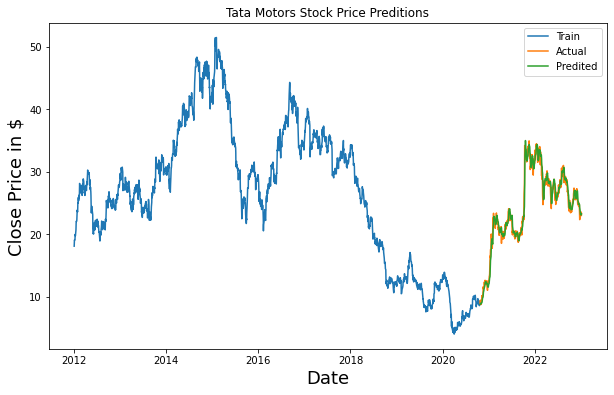

In [39]:
#Ploting the Graph for training data + Predicted data + Actual Data
plt.figure(figsize=(10,6))
plt.title("Tata Motors Stock Price Preditions")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price in $",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'pred']])
plt.legend(['Train','Actual','Predited'])
plt.show()